# 分类准确度

手写数字识别

模型评测？？

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
# print格式化输出
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [9]:
# 每一行64个数据
X[:2]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

### 查看1个数据

In [10]:
some_digit = X[668]

In [11]:
y[668]

2

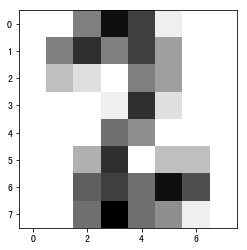

In [12]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary) # plt.cm.binary
# plt.show()

## 制作数据集

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
print(X_train.shape)
print(y_train.shape)

(1437, 64)
(1437,)


In [16]:
print(X_test.shape)
print(y_test.shape)

(360, 64)
(360,)


## 调用自己的kNN模型

In [17]:
from playML.kNN import KNNClassifier

In [18]:
my_knn_clf = KNNClassifier(k=3)

In [19]:
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [20]:
y_predict = my_knn_clf.predict(X_test)

In [21]:
y_predict.shape

(360,)

In [22]:
sum(y_predict==y_test)

355

In [23]:
sum(y_predict==y_test) / len(y_test)

0.98611111111111116

## 分类准确率

自己封装metrics.py

`def accuracy_score(y_true, y_predict):`

In [24]:
from playML.metrics import accuracy_score

In [25]:
accuracy_score(y_predict, y_test)

0.98611111111111116

## 准确度分析封装到kNN
`from .metrics import accuracy_score`

`def score(self, X_test, y_test):`

In [26]:
my_knn_clf.score(X_test, y_test)

0.98611111111111116

<br><br>

## scikit-learn 中的 accuracy_score

不关心predict预测的是什么

只看准确率

In [28]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [39]:
y_train.shape

(360, 64)

In [41]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
knn_clf.score(X_test, y_test)

0.98888888888888893

In [43]:
from sklearn.metrics import accuracy_score

In [45]:
y_predict = knn_clf.predict(X_test)

In [46]:
accuracy_score(y_test, y_predict)

0.98888888888888893